In [1]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 919.0 kB/s eta 0:00:43
   ---------------------------------------- 0.2/38.8 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.8/38.8 MB 4.5 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.8 MB 6.5 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/38.8 MB 9.9 MB/s eta 0:00:04
   --- ------------------------------------ 3.0/38.8 MB 10.8 MB/s eta 0:00:04
   ---- ----------------------------------- 3.9/38.8 MB 11.4 MB/s eta 0:00:04
   ----- ---------------------------------- 5.1/38.8 MB 13.1 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.8 MB 13.8 MB/s eta 0:00:03
   ------- -------------------------------- 7.3/38.8 MB 14.7 MB/s eta 0:00:03
   -------- ------------------------------- 8.5/38.8 MB 15.6 MB/s eta 0:00:02
   --

In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
def read_and_resize_images_from_folder(folder_path, target_size):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                resized_img = cv2.resize(img, target_size)
                #images.append(resized_img.flatten())
                images.append(resized_img.reshape(-1,))
    return images

In [5]:
images_with_mask = read_and_resize_images_from_folder('Dataset/with_mask',(256,256))

In [7]:
images_without_mask = read_and_resize_images_from_folder('Dataset/without_mask',(256,256))

In [9]:
X = images_with_mask + images_without_mask

In [11]:
y = [1] * len(images_with_mask) + [0] * len(images_without_mask)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [17]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [33]:
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.902127659574468

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       109
           1       0.93      0.88      0.91       126

    accuracy                           0.90       235
   macro avg       0.90      0.90      0.90       235
weighted avg       0.90      0.90      0.90       235



In [18]:
svm_model.predict(X_test[5].reshape(1,-1))

array([1])

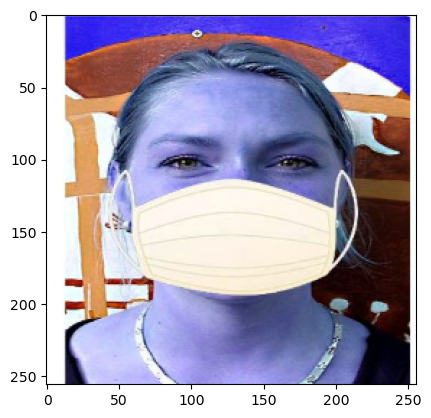

In [27]:
plt.imshow(X_test[5].reshape(256,256,3))

In [43]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [45]:
def read_and_resize_images_from_folder(folder_path, target_size):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                resized_img = cv2.resize(img, target_size)
                #images.append(resized_img.flatten())
                images.append(resized_img.reshape(-1,))
    return images

In [69]:
images_dogs = read_and_resize_images_from_folder('dog_cats/test/dogs',(256,256))


In [75]:
images_cats = read_and_resize_images_from_folder('dog_cats/test/cats',(256,256))

In [77]:
X = images_dogs + images_cats

In [79]:
y = [1] * len(images_dogs) + [0] * len(images_cats)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [85]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [54]:
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7101694915254237

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       293
           1       0.71      0.72      0.71       297

    accuracy                           0.71       590
   macro avg       0.71      0.71      0.71       590
weighted avg       0.71      0.71      0.71       590



In [29]:
svm_model.predict(X_test[5].reshape(1,-1))

array([1])

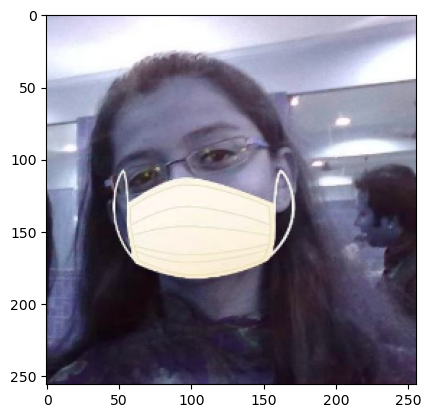

In [33]:
plt.imshow(X_test[15].reshape(256,256,3))

In [37]:
def read_and_resize_images_from_folder(folder_path, target_size):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                resized_img = cv2.resize(img, target_size)
                #images.append(resized_img.flatten())
                images.append(resized_img.reshape(-1,))
    return images

In [39]:
images_pizza = read_and_resize_images_from_folder('pizza_not_pizza/pizza',(256,256))

In [40]:
images_not_pizza = read_and_resize_images_from_folder('pizza_not_pizza/not_pizza',(256,256))

In [42]:
X = images_pizza + images_not_pizza

In [47]:
y = [1] * len(images_pizza) + [0] * len(images_not_pizza)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [53]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [56]:
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7101694915254237

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       293
           1       0.71      0.72      0.71       297

    accuracy                           0.71       590
   macro avg       0.71      0.71      0.71       590
weighted avg       0.71      0.71      0.71       590



In [57]:
svm_model.predict(X_test[15].reshape(1,-1))

array([0])

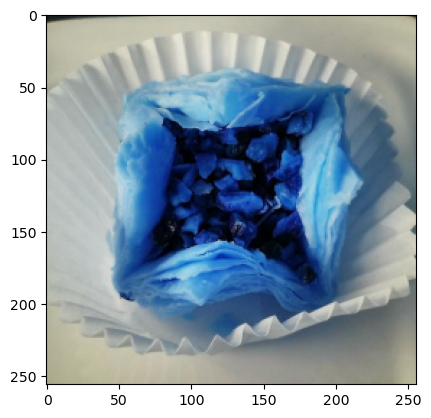

In [58]:
plt.imshow(X_test[15].reshape(256,256,3))